# General Concepts
 matplotlib has an extensive codebase that can be daunting to many new users. However, most of matplotlib can be understood with a fairly simple conceptual framework and knowledge of a few important points.

 Plotting requires action on a range of levels, from the most general (e.g., 'contour this 2-D array') to the most specific (e.g., 'color this screen pixel red'). The purpose of a plotting package is to assist you in visualizing your data as easily as possible, with all the necessary control -- that is, by using relatively high-level commands most of the time, and still have the ability to use the low-level commands when needed.

 Therefore, everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib "state-machine environment" which is provided by the matplotlib.pyplot module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

'Note

Pyplot's state-machine environment behaves similarly to MATLAB and should be most familiar to users with MATLAB experience.'

The next level down in the hierarchy is the first level of the object-oriented interface, in which pyplot is used only for a few functions such as figure creation, and the user explicitly creates and keeps track of the figure and axes objects. At this level, the user uses pyplot to create figures, and through those figures, one or more axes objects can be created. These axes objects are then used for most plotting actions.

For even more control -- which is essential for things like embedding matplotlib plots in GUI applications -- the pyplot level may be dropped completely, leaving a purely object-oriented approach.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

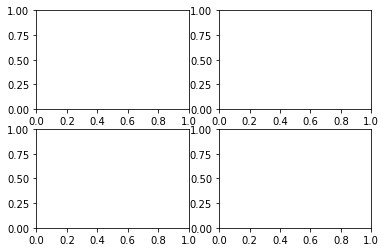

In [6]:
fig = plt.figure() # an empty figure with no axes
fig.suptitle('No axes on this figure') # Add a title so we know which it is

fig, ax_1st = plt.subplots(2,2) # a figure with a 2*2 grid of Axes

### Axes

- Axes : 
    - 데이터가 그려지는 구역, 
    - 하나의 figure는 많은 Axes들을 포함할 수 있음,
    - Axes는 보통 2개의 Axis를 포함(3차원은 3개)
    - [Axes.set_xlim()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlim.html#matplotlib.axes.Axes.set_xlim),[Axies.set_ylim](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylim.html#matplotlib.axes.Axes.set_ylim)을 통해 x축 데이터의 범위를 정할 수 있음
    - [Axes.set_title()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title)을 사용해 Axes의 제목 지정가능
    - [Axes.set_xlabel()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel),[Axes._set_ylable()](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel)를 통해x축,y축의 제목 지정가능


### Axis
- Axis
    - 그래프의 범위,축의 눈금, 눈금의 라벨지정
    - [matplotlib.ticker.Lccator](https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.Locator)을 이용해 눈금의 위치 지정가능
    - [matplotlib.ticker.Formatter](https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.Formatter)을 이용해 눈금 라벨의 형태 지정가능
    

## Types of inputs to plotting functions
- 모든 plotting 함수들은 np.array 또는 np.ma.masked_array를 입력으로 받는다.
- 판다스 객체나 np.matrix같은 것들은 오류날 수 도 있다.
- 그래서 왠만하면 np.array형태로 변환하고 plotting 하자.

In [14]:
# example of convert pandas.DataFrame to np.array
import pandas as pd
a = pd.DataFrame(np.random.rand(4,5), columns = list('abegd'))
a_asarray = a.values
print(type(a_asarray))

<class 'numpy.ndarray'>


In [13]:
# example of convert np.matrix to np.array
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)
print(type(b_asarray))

<class 'numpy.ndarray'>


## Matplotlib, pyplot and pylab: how are they related?
- Matplotlib.pyplot은 matplotlib안의 모듈
- matplotlib.pyplot은 가장 최근에 만들어진 figure를 다루는 데 사용?
- pylab은 matplotlib.pyplot과 numpy를 동시에 불러 옴.

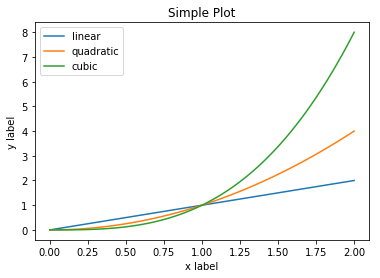

In [29]:
x = np.linspace(0,2,100)

plt.plot(x, x, label='linear')
plt.plot(x,x**2,label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title('Simple Plot')

plt.legend()

plt.show()

## Coding Styles
- 두 개의 스타일이 있지만 섞어쓰지만 않으면 둘 다 괜찮다.
- pyplot스타일과 pylab스타일

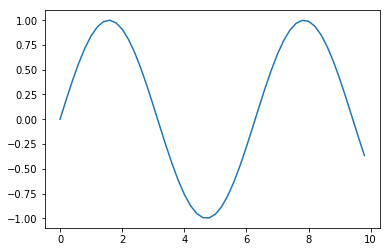

In [36]:
# pyplot
# the imports at the top of your scripts will typically be:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,10,0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y)

plt.show()

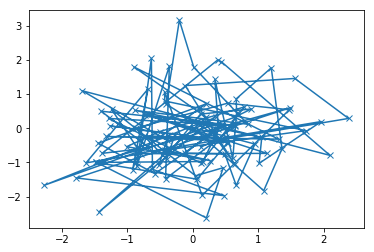

In [39]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph
    Prameters
    ---------
    ax :  Axes
        The axes to draw to
    data1 : array
        The x data
    data2 : array
        The y data
    param_dict : dict
        Dictionary of kwargs to pass to ax.plot
    
    Returns
    -------
    out : List
        List of artists added
    """
    out = ax.plot(data1,data2,**param_dict)
    return out
data1,data2,data3,data4 = np.random.randn(4,100)
fig, ax = plt.subplots(1,1)
my_plotter(ax,data1,data2,{'marker':'x'})

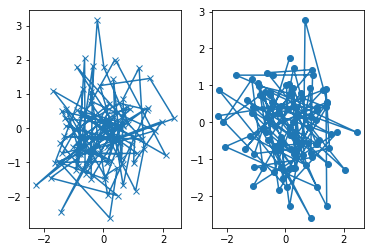

In [41]:
fig, (ax1,ax2) = plt.subplots(1,2)
my_plotter(ax1, data1,data2,{'marker':'x'})
my_plotter(ax2, data3,data4,{'marker':'o'})
plt.show()

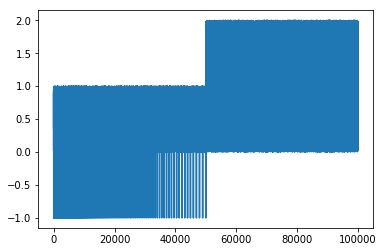

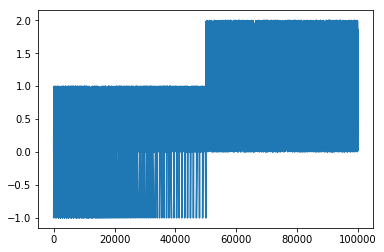

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)
plt.show()

mpl.rcParams['path.simplify_threshold'] = 1.0
plt.plot(y)
plt.show()